In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('./data/spam.csv')

In [32]:
df.head ()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
sentences = df['Message'].tolist()
labels = df['Category'].tolist()

In [34]:
train_size = int(len(sentences) * 0.9)

In [35]:
training_sentences = sentences[0:train_size]
testing_sentences = sentences[train_size:]
training_labels = labels[0:train_size]
testing_labels = labels[train_size:]

In [36]:
import numpy as np

In [37]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [38]:
vocab_size = 500
embedding_dim = 32
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [39]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [40]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [41]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [42]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

ok lar <OOV> wif u <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Ok lar... Joking wif u oni...


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [44]:
# from tensorflow import keras

In [45]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(LSTM(20))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

c:\Users\student\Desktop\WrkShp\WrkShp\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
num_epochs = 10
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8621 - loss: 0.4437 - val_accuracy: 0.8710 - val_loss: 0.3856
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8884 - loss: 0.3286 - val_accuracy: 0.9803 - val_loss: 0.1134
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9763 - loss: 0.1026 - val_accuracy: 0.9875 - val_loss: 0.0558
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9811 - loss: 0.0778 - val_accuracy: 0.9803 - val_loss: 0.0596
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9826 - loss: 0.0654 - val_accuracy: 0.9803 - val_loss: 0.0462
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9875 - loss: 0.0515 - val_accuracy: 0.9928 - val_loss: 0.0375
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9889 - loss: 0.0453 - val_accuracy: 0.9910 - val_loss: 0.0441
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9912 - loss: 0.0452 - val_accuracy: 0.

In [48]:
import matplotlib.pyplot as plt

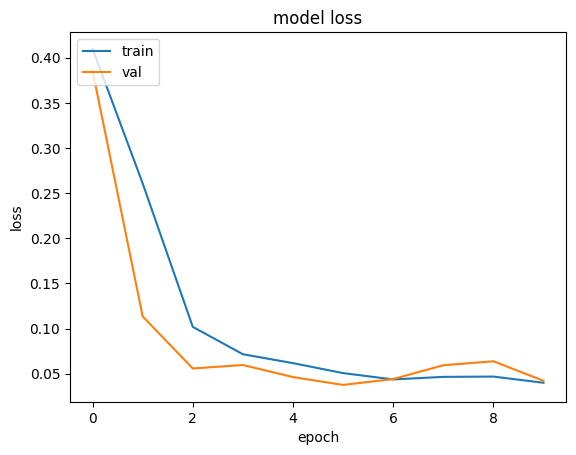

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(500, 32)


In [51]:
text_messages = ['Call me back once you get this?',
                'Congrats on your new offers! Click here to claim your prize...',
                'Really like that new photo of you',
                'Did you hear the news today? Total fiasco',
                'Attend this data science meet...',
                'Are you coming to the party tonight?',
                'Your items have gone missing, let me know if you find them',
                'Do not forget to bring your friends!',
                'You have won a million dollars! Fill out your bank details here...',
                'Looking forward to seeing you again']

In [52]:
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(text_messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)
classes = model.predict(fakes_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [53]:
for x in range(len(text_messages)):
    print(text_messages[x])
    print(classes[x])
    print('\n')

Call me back once you get this?
[0.00759015]


Congrats on your new offers! Click here to claim your prize...
[0.98155737]


Really like that new photo of you
[0.00509714]


Did you hear the news today? Total fiasco
[0.00464208]


Attend this data science meet...
[0.01954392]


Are you coming to the party tonight?
[0.00662116]


Your items have gone missing, let me know if you find them
[0.00487386]


Do not forget to bring your friends!
[0.0050096]


You have won a million dollars! Fill out your bank details here...
[0.98155093]


Looking forward to seeing you again
[0.00736542]




In [54]:
import io

out_v = io.open('./savedModels/content/vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('./savedModels/content/metadata.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [55]:
model.save('./savedModels/content/model.h5')

In [56]:
import pickle

with open('./savedModels/content/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
with open('./savedModels/content/tokenizer.pickle', 'rb') as handle:
    token = pickle.load(handle)

In [58]:
text_a = ['You have won 2 trillion dollars']
padding_type='post'
sample_sequences = token.texts_to_sequences(text_a)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=50)
classes = model.predict(fakes_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [59]:
classes

array([[0.50372803]], dtype=float32)

In [60]:
from tensorflow.keras.models import load_model
models = load_model('./savedModels/content/model.h5')

In [61]:
text_a = ['You have cracked the interview']
padding_type='post'
sample_sequences = token.texts_to_sequences(text_a)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=50)
classes = models.predict(fakes_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [62]:
classes

array([[0.00829312]], dtype=float32)

In [63]:
tf.version.VERSION

'2.16.1'

In [64]:
import json

In [65]:
tokenizer_json = tokenizer.to_json()
with io.open('./savedModels/content/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))